# EDA

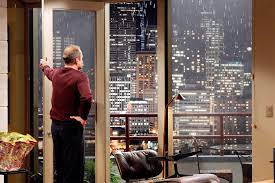

This notebook is about the explortory data analysis with Python. 
A real estate data set from king county has been used to perform an analysis based on three hypotheses

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Hypothesis

#### Case

Amy Williams - Seller - A Mafiosi, sells several central houses(top10%) over time, needs average outskirt houses over time to hide from the FBI

---
#### Hypothese

1. ##### XXXX
H₀: There is no significant difference in the time intervals between central property sales and outskirt property transactions compared to quarterly timing.
H₁: The monthly intervals between central property sales show consistent patterns, while outskirt property transactions demonstrate irregular intervals that deviate from typical monthly patterns.

2.
H₀: There is no significant difference in the distribution of a sales pattern of outskirt properties compared to central properties. 
H₁: The geographic sales distribution of outskirt properties shows significantly higher values (covering at least three different suburban areas) compared to central properties.

3.
H₀: There is no significant difference between the value/price ratio of central to outskirts property sales compared to the overall market ratio over a 12 month period.
H₁: The value/price ratio of central to outskirts property sales is significantly higher than the overall market ratio over a 12 month period.


### Data Import

In [2]:
# Read data with Pandas from the data folder
df = pd.read_csv('data/King_County_House_prices_dataset.csv') 

### Data Info

In [3]:
df.shape
# Dataset has got 21,597 rows and 21 columns

(21597, 21)

In [4]:
df.head(2)

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  7129300520     3.000      1.000     1180.000  5650.000   1.000         NaN   
1  6414100192     3.000      2.250     2570.000  7242.000   2.000       0.000   

   view  condition  grade  ...  sqft_basement  yr_built  yr_renovated  \
0 0.000          3      7  ...          0.000      1955         0.000   
1 0.000          3      7  ...        400.000      1951     19910.000   

   zipcode    lat     long  sqft_living15  sqft_lot15        date      price  
0    98178 47.511 -122.257       1340.000    5650.000  2014-10-13 221900.000  
1    98125 47.721 -122.319       1690.000    7639.000  2014-12-09 538000.000  

[2 rows x 21 columns]

In [5]:
# Describe function used to get an overview of the dataframe and its values
df.describe() 

id  bedrooms  bathrooms  sqft_living    sqft_lot    floors  \
count      21597.000 21597.000  21597.000    21597.000   21597.000 21597.000   
mean  4580474287.771     3.373      2.116     2080.322   15099.409     1.494   
std   2876735715.748     0.926      0.769      918.106   41412.637     0.540   
min      1000102.000     1.000      0.500      370.000     520.000     1.000   
25%   2123049175.000     3.000      1.750     1430.000    5040.000     1.000   
50%   3904930410.000     3.000      2.250     1910.000    7618.000     1.500   
75%   7308900490.000     4.000      2.500     2550.000   10685.000     2.000   
max   9900000190.000    33.000      8.000    13540.000 1651359.000     3.500   

       waterfront      view  condition     grade  sqft_above  sqft_basement  \
count   19206.000 21534.000  21597.000 21597.000   21597.000      21145.000   
mean        0.008     0.234      3.410     7.658    1788.597        291.857   
std         0.087     0.766      0.651     1.173     827.760        442.491   
min         0.000     0.000      1.000     3.000     370.000          0.000   
25%         0.000     0.000      3.000     7.000    1190.000          0.000   
50%         0.000     0.000      3.000     7.000    1560.000          0.000   
75%         0.000     0.000      4.000     8.000    2210.000        560.000   
max         1.000     4.000      5.000    13.000    9410.000       4820.000   

       yr_built  yr_renovated   zipcode       lat      long  sqft_living15  \
count 21597.000     17749.000 21597.000 21597.000 21597.000      21597.000   
mean   1971.000       836.651 98077.952    47.560  -122.214       1986.620   
std      29.375      4000.111    53.513     0.139     0.141        685.230   
min    1900.000         0.000 98001.000    47.156  -122.519        399.000   
25%    1951.000         0.000 98033.000    47.471  -122.328       1490.000   
50%    1975.000         0.000 98065.000    47.572  -122.231       1840.000   
75%    1997.000         0.000 98118.000    47.678  -122.125       2360.000   
max    2015.000     20150.000 98199.000    47.778  -121.315       6210.000   

       sqft_lot15       price  
count   21597.000   21597.000  
mean    12758.284  540296.574  
std     27274.442  367368.140  
min       651.000   78000.000  
25%      5100.000  322000.000  
50%      7620.000  450000.000  
75%     10083.000  645000.000  
max    871200.000 7700000.000

In [6]:
# Checking the datatypes for possible changes
df.dtypes

id                 int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
date              object
price            float64
dtype: object

In [7]:
# Check for duplicated rows
df[df.duplicated()]

Empty DataFrame
Columns: [id, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15, date, price]
Index: []

[0 rows x 21 columns]

### Data Cleaning

#### NULL/NA

In [8]:
# Check for null values in the different columns
df.isnull().sum()

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
dtype: int64

In [9]:
# Check for na values in the different columns
df.isna().sum()

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
dtype: int64

In [10]:
# The Dataset shwos null/na values in the rows waterfront, view, sqft_basement and yr_renovated.
# Based on the information a the na values for waterfront and yr_renovated will be filled. NA in sqft basement will be set to 0 as they will be treated as they havent got any basement.

In [11]:
df['waterfront'].unique()

array([nan,  0.,  1.])

In [12]:
df['waterfront'] = df['waterfront'].fillna(0)

Throught the analysis i consider that any house which has got an NA value does not have access to the waterfront. Therefor the values are replaced with 0

### Date Transform

In [13]:
# Observe destinct values in yr_renovated 
df['yr_renovated'].unique()

array([    0., 19910.,    nan, 20020., 20100., 19920., 20130., 19940.,
       19780., 20050., 20030., 19840., 19540., 20140., 20110., 19830.,
       19450., 19900., 19880., 19770., 19810., 19950., 20000., 19990.,
       19980., 19700., 19890., 20040., 19860., 20070., 19870., 20060.,
       19850., 20010., 19800., 19710., 19790., 19970., 19500., 19690.,
       19480., 20090., 20150., 19740., 20080., 19680., 20120., 19630.,
       19510., 19620., 19530., 19930., 19960., 19550., 19820., 19560.,
       19400., 19760., 19460., 19750., 19640., 19730., 19570., 19590.,
       19600., 19670., 19650., 19340., 19720., 19440., 19580.])

In [14]:
# defining a function to return the correct year values by dividing those by ten (leaving out NA)
def extract_year(val):
    if pd.isna(val) or val == 0:
        return np.nan
    val = int(val)
    if val > 3000:
        val = val // 10
    if 1900 <= val <= 2100:
        return val
    else:
        return np.nan

df['yr_renovated'] = df['yr_renovated'].apply(extract_year)

#### Date to datetime

Converting to datetime

In [15]:
df['date'] = pd.to_datetime(df['date'])

In [16]:
df['yr_built'] = pd.to_datetime(df['yr_built'])

In [17]:
df['yr_built'] = df['yr_built'].dt.year

In [18]:
df['date'].sort_values()

7316    2014-05-02
20586   2014-05-02
1040    2014-05-02
20543   2014-05-02
9587    2014-05-02
           ...    
19381   2015-05-14
12623   2015-05-14
5632    2015-05-15
13040   2015-05-24
16580   2015-05-27
Name: date, Length: 21597, dtype: datetime64[ns]

#### Converting sqft to sqm as the client is Italian

In [19]:
df.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price'],
      dtype='object')

In [20]:
# Defining a function to convert values in columns
def sqft_sqm(x):
    return x / 10.764
    
# Convert values to sqm in columns by applying the function
df['sqft_living'] = df['sqft_living'].apply(sqft_sqm)
df['sqft_lot'] = df['sqft_lot'].apply(sqft_sqm)
df['sqft_above'] = df['sqft_above'].apply(sqft_sqm)
df['sqft_basement'] = df['sqft_basement'].apply(sqft_sqm)
df['sqft_living15'] = df['sqft_living15'].apply(sqft_sqm)
df['sqft_lot15'] = df['sqft_lot15'].apply(sqft_sqm)

In [21]:
# Renaming columns as those are now in sqm
df.columns = [col.replace('sqft', 'sqm') if 'sqft' in col else col for col in df.columns]
df.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqm_living', 'sqm_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqm_above', 'sqm_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqm_living15',
       'sqm_lot15', 'date', 'price'],
      dtype='object')

In [22]:
# Valuation

def evaluate_sale_value(row):
    # Normalize each feature to a 0-1 scale based on min/max in the dataset
    grade_norm = (row['grade'] - df['grade'].min()) / (df['grade'].max() - df['grade'].min())
    price_norm = (row['price'] - df['price'].min()) / (df['price'].max() - df['price'].min())
    condition_norm = (row['condition'] - df['condition'].min()) / (df['condition'].max() - df['condition'].min())
    
    # Assign weights to each feature (adjust as needed)
    score = 0.4 * grade_norm + 0.4 * price_norm + 0.2 * condition_norm
    
    # Scale to 1-10 and round
    value_score = int(np.round(1 + score * 9))
    return value_score

# Apply the function to each row
df['value_score'] = df.apply(evaluate_sale_value, axis=1)


In [23]:
df.head()

id  bedrooms  bathrooms  sqm_living  sqm_lot  floors  waterfront  \
0  7129300520     3.000      1.000     109.625  524.898   1.000       0.000   
1  6414100192     3.000      2.250     238.759  672.798   2.000       0.000   
2  5631500400     2.000      1.000      71.535  929.023   1.000       0.000   
3  2487200875     4.000      3.000     182.088  464.511   1.000       0.000   
4  1954400510     3.000      2.000     156.076  750.650   1.000       0.000   

   view  condition  grade  ...  yr_built  yr_renovated  zipcode    lat  \
0 0.000          3      7  ...      1970           NaN    98178 47.511   
1 0.000          3      7  ...      1970      1991.000    98125 47.721   
2 0.000          3      6  ...      1970           NaN    98028 47.738   
3 0.000          5      7  ...      1970           NaN    98136 47.521   
4 0.000          3      8  ...      1970           NaN    98074 47.617   

      long  sqm_living15  sqm_lot15       date      price value_score  
0 -122.257       124.489    524.898 2014-10-13 221900.000           3  
1 -122.319       157.005    709.680 2014-12-09 538000.000           4  
2 -122.233       252.694    748.978 2015-02-25 180000.000           3  
3 -122.393       126.347    464.511 2014-12-09 604000.000           4  
4 -122.045       167.224    697.046 2015-02-18 510000.000           4  

[5 rows x 22 columns]

### EDA

#### Exploration

In [24]:
df.dtypes

id                       int64
bedrooms               float64
bathrooms              float64
sqm_living             float64
sqm_lot                float64
floors                 float64
waterfront             float64
view                   float64
condition                int64
grade                    int64
sqm_above              float64
sqm_basement           float64
yr_built                 int32
yr_renovated           float64
zipcode                  int64
lat                    float64
long                   float64
sqm_living15           float64
sqm_lot15              float64
date            datetime64[ns]
price                  float64
value_score              int64
dtype: object

In [25]:
df.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqm_living', 'sqm_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqm_above', 'sqm_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqm_living15',
       'sqm_lot15', 'date', 'price', 'value_score'],
      dtype='object')

In [26]:
# List of numeric values
numeric_values = ['bedrooms', 'bathrooms', 'sqm_living', 'sqm_lot', 'floors', 'condition', 
                  'grade', 'sqm_above', 'sqm_basement', 'sqm_living15', 'sqm_lot15', 'price']

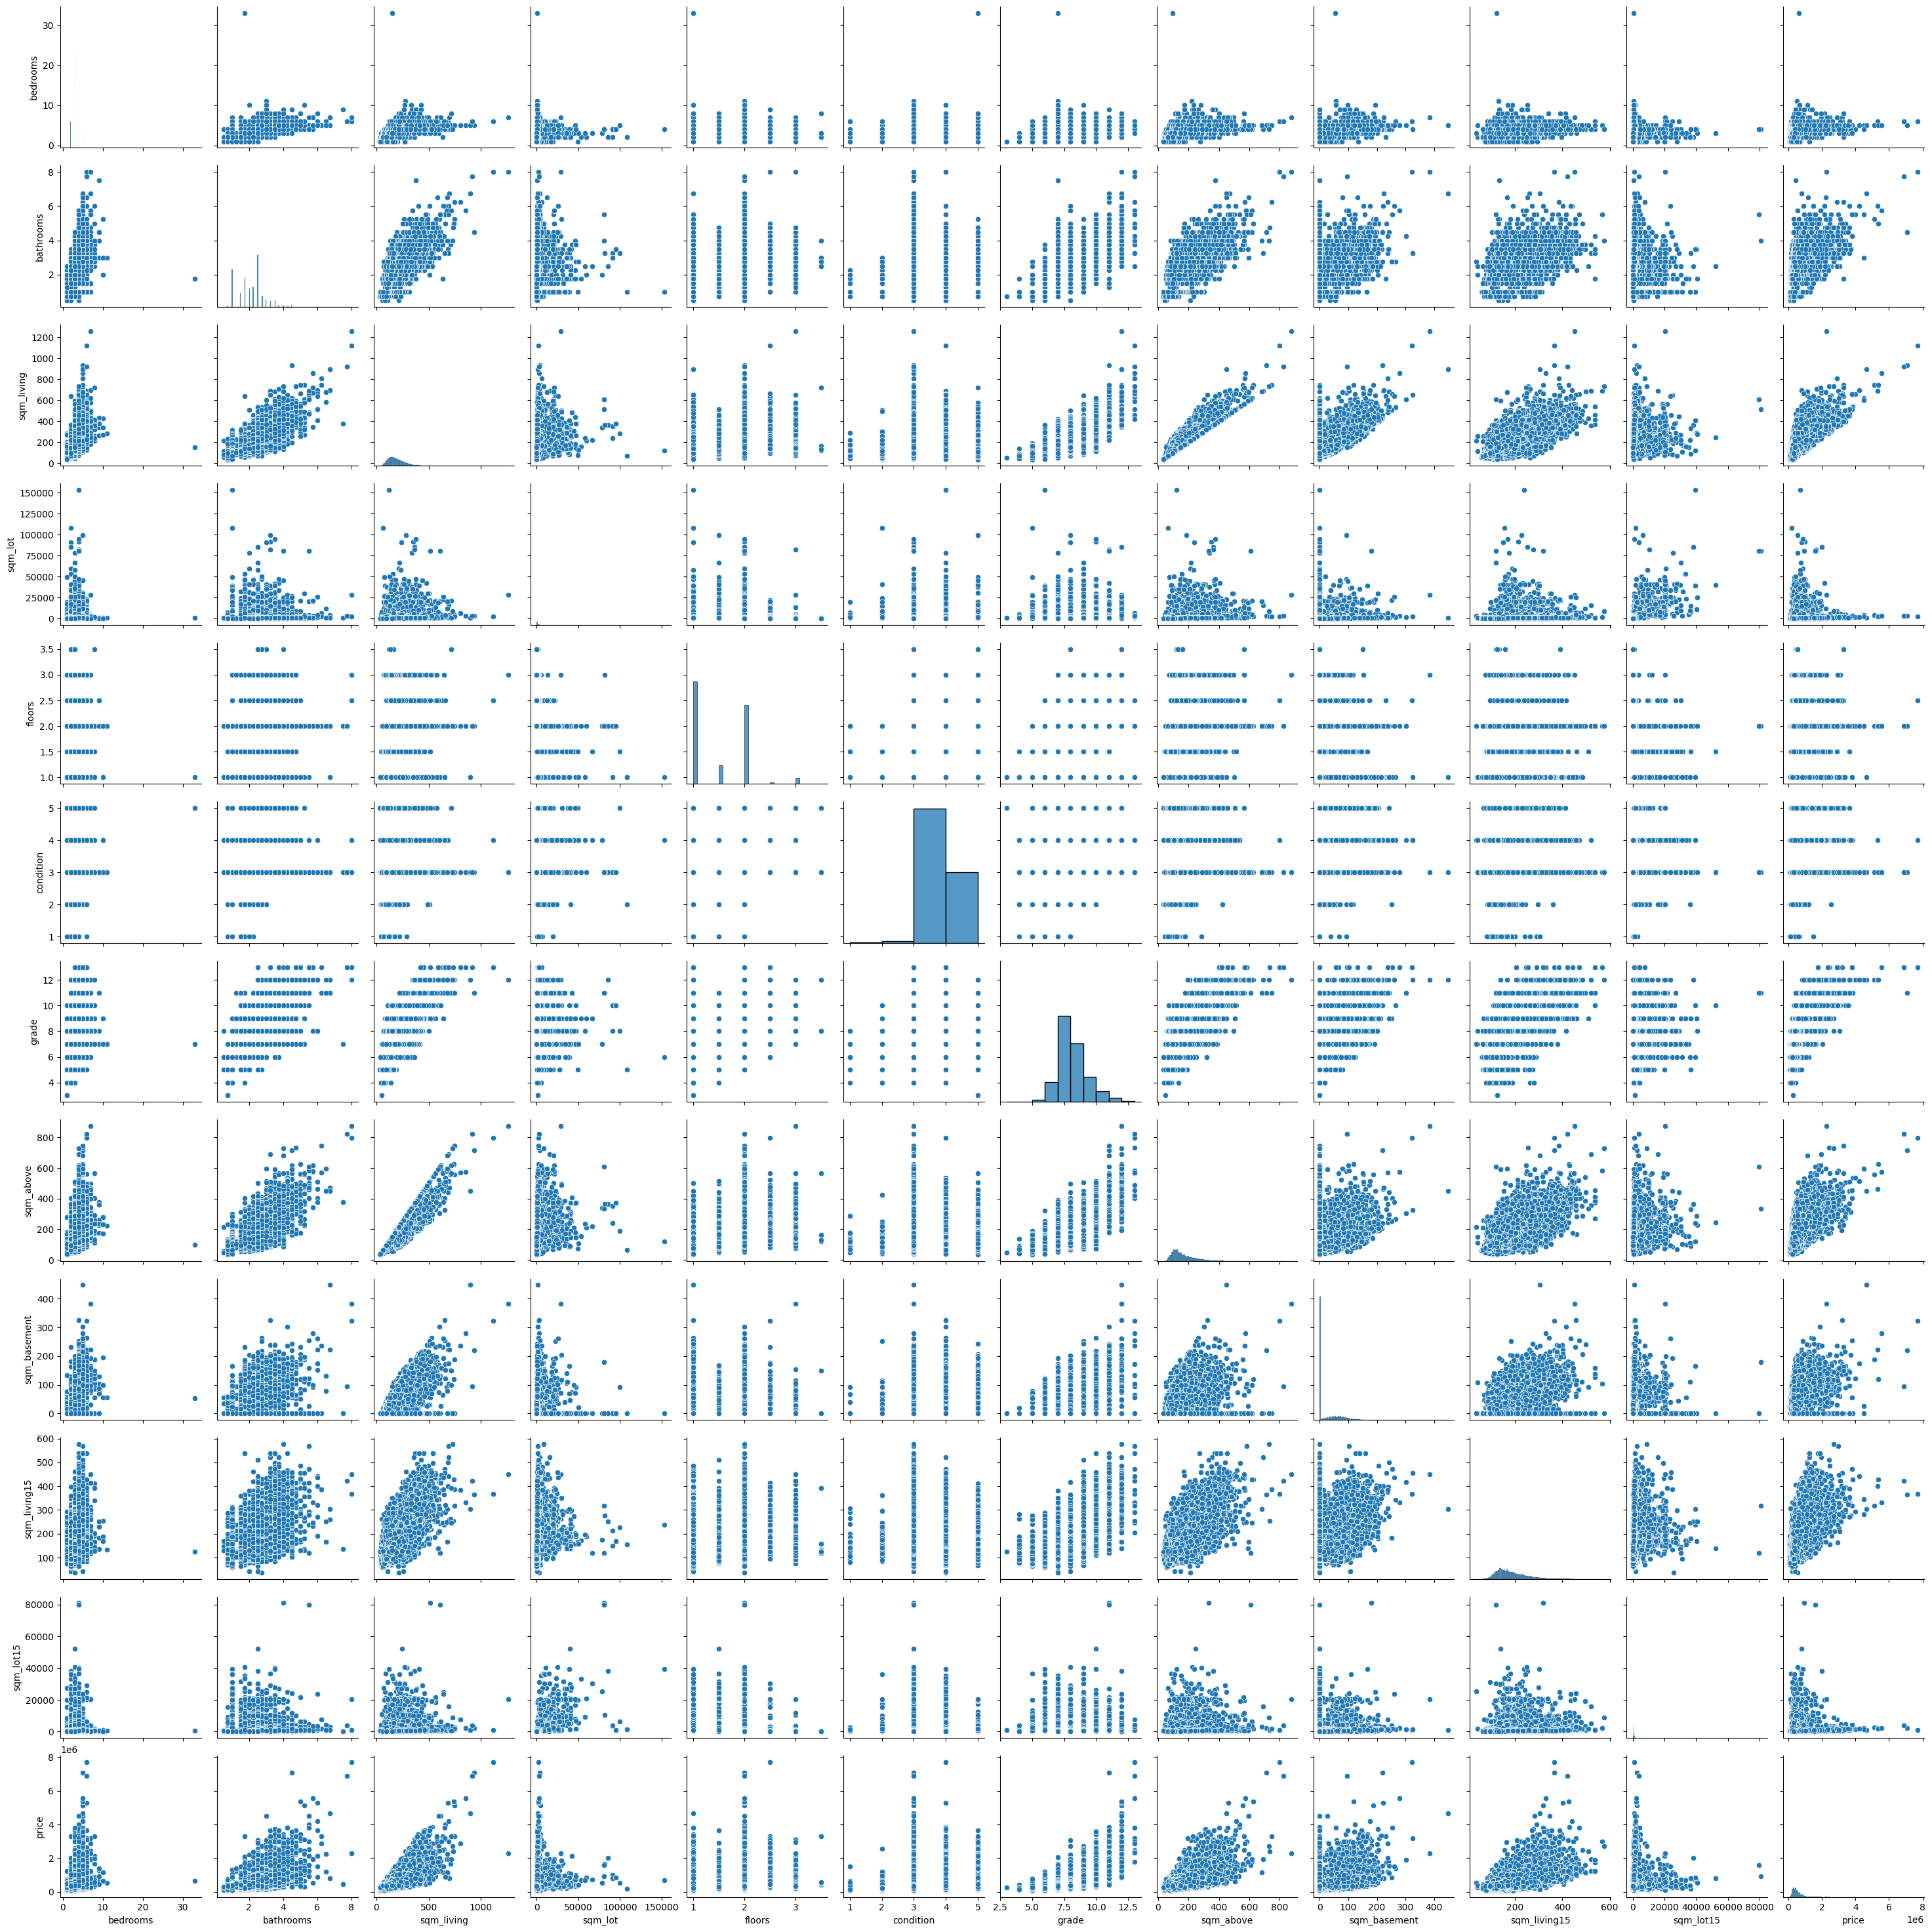

In [27]:
# Pairplor for a rough overview how the different numeric values are corresponding
sns.pairplot(df, vars=numeric_values)

plt.show()

Creating different lists for plotting and further analysis

##### Space

In [28]:
df_sqm = df[['id','sqm_living','sqm_lot','sqm_above','sqm_basement','sqm_living15','sqm_lot15']]

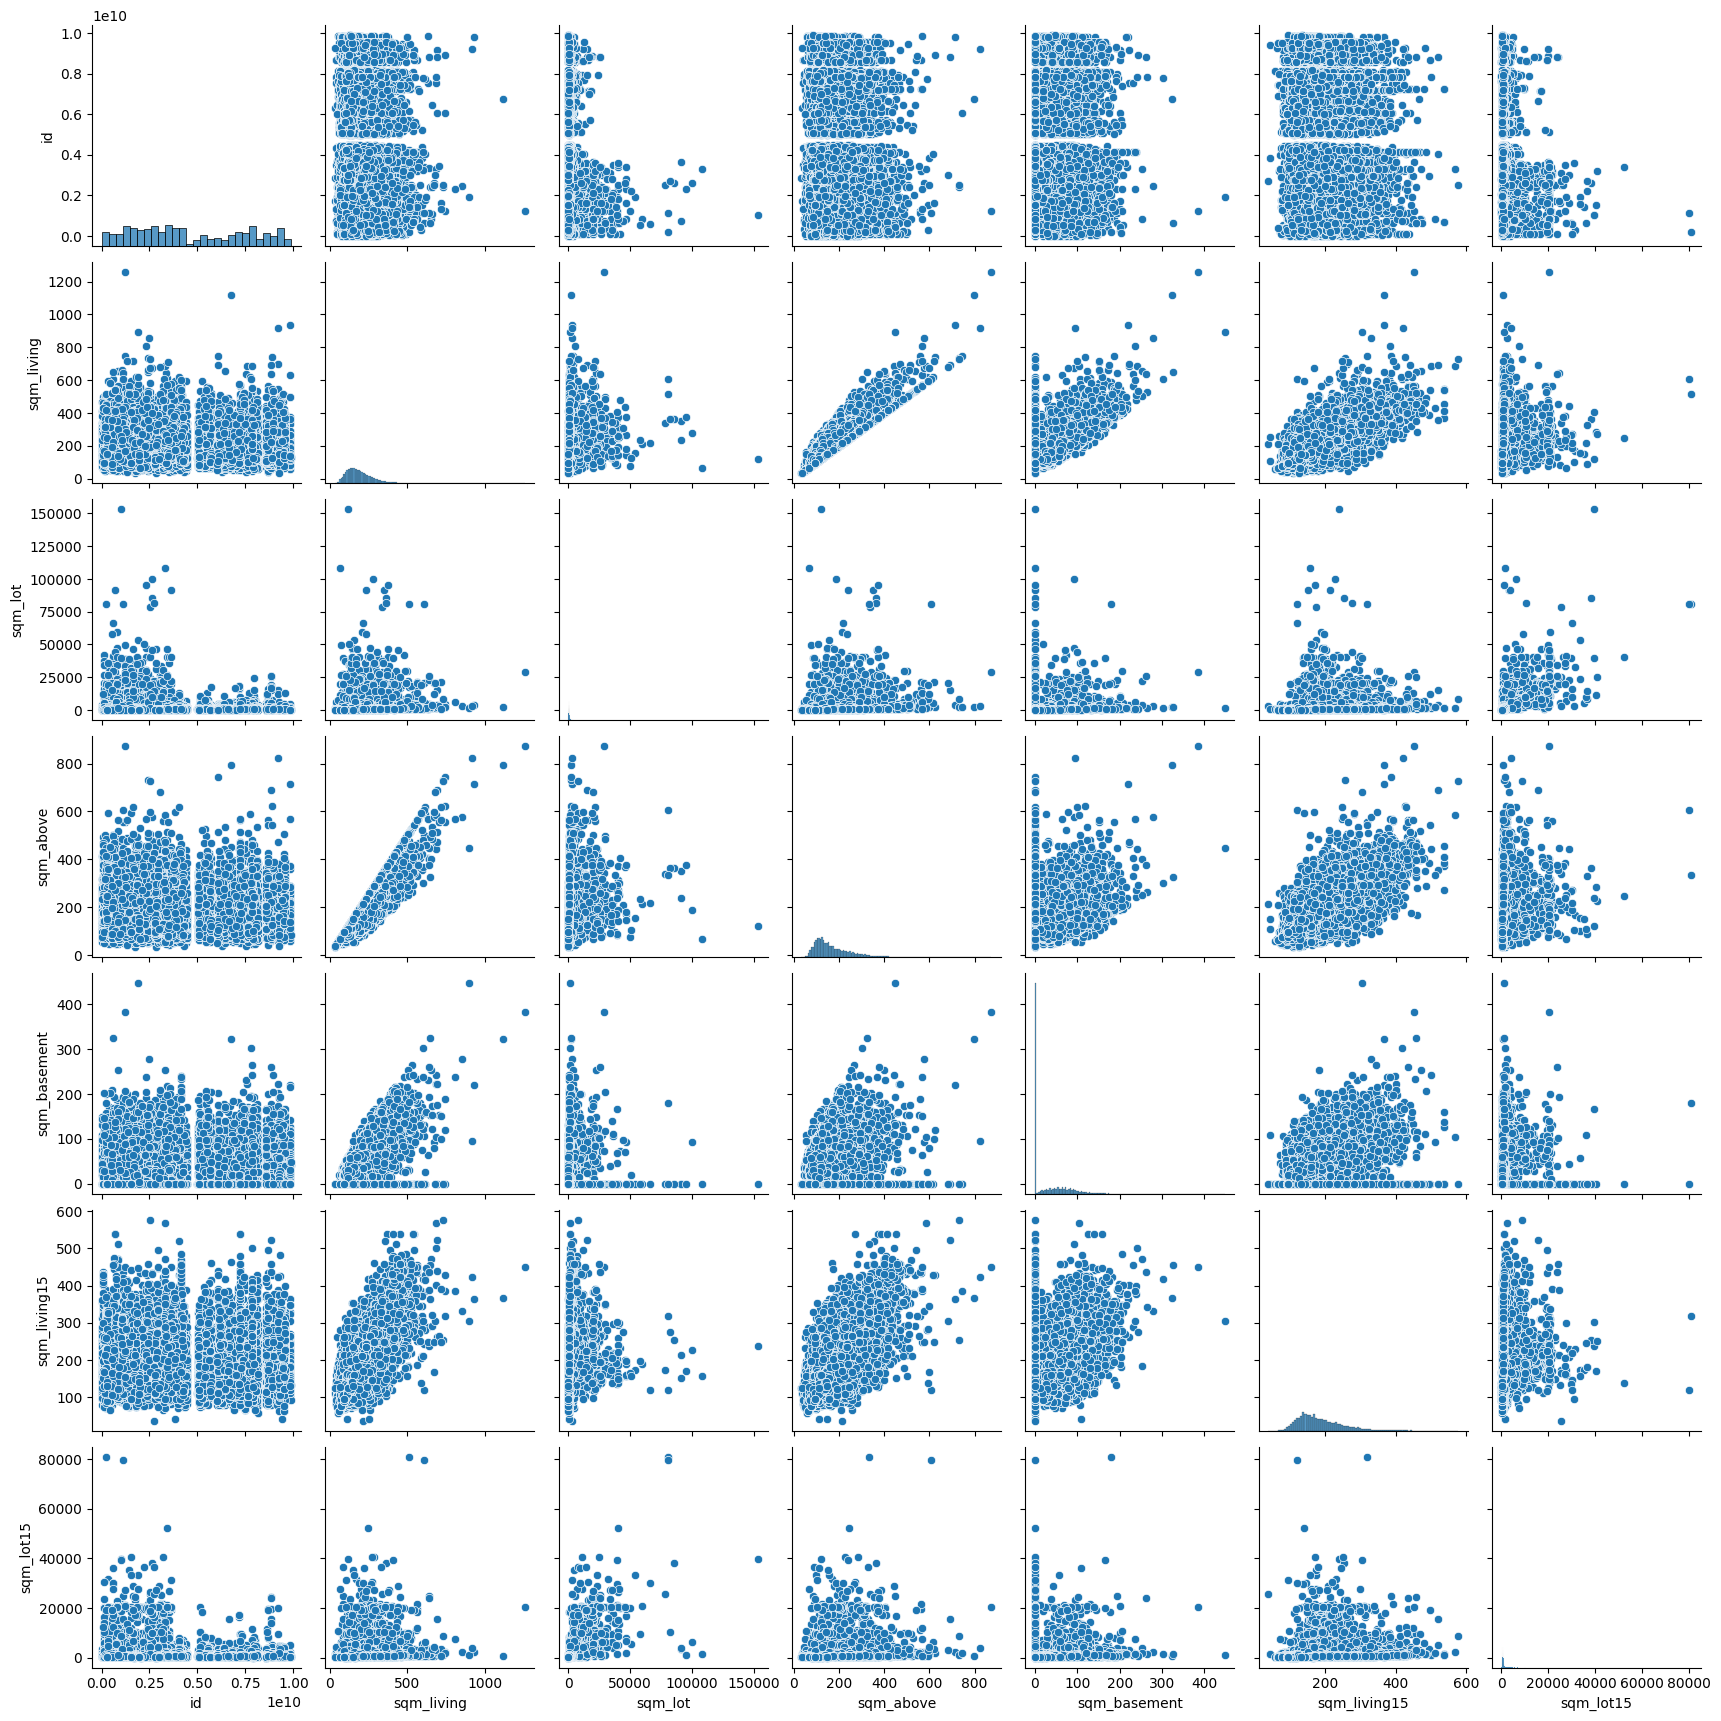

In [29]:
sns.pairplot(df, vars=df_sqm)

#### Location (Outskirts / Central)

The location should be defined by three columns: 'zipcode', 'lat', 'long'

In [30]:
df['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

In [31]:
zip_to_city = {
    98001: "Auburn",
    98002: "Auburn",
    98003: "Auburn",
    98004: "Bellevue",
    98005: "Bellevue",
    98006: "Bellevue",
    98007: "Bellevue",
    98008: "Bellevue",
    98009: "Bellevue",
    98010: "Black Diamond",
    98011: "Bothell",
    98013: "Burton, Vashon",
    98014: "Carnation",
    98015: "Bellevue",
    98019: "Duvall",
    98022: "Enumclaw",
    98023: "Auburn",
    98024: "Fall City",
    98025: "Hobart",
    98027: "Issaquah",
    98028: "Kenmore, Bothell",
    98029: "Issaquah",
    98030: "Kent",
    98031: "Kent",
    98032: "Kent",
    98033: "Kirkland",
    98034: "Kirkland",
    98035: "Kent",
    98038: "Maple Valley",
    98039: "Medina",
    98040: "Mercer Island",
    98041: "Bothell",
    98042: "Kent",
    98045: "North Bend",
    98047: "Auburn",
    98050: "Preston",
    98051: "Ravensdale",
    98052: "Redmond",
    98053: "Redmond",
    98054: "Redondo",
    98055: "Renton",
    98056: "Renton",
    98057: "Renton",
    98058: "Renton",
    98059: "Renton",
    98062: "Seahurst",
    98063: "Auburn",
    98064: "Kent",
    98065: "Snoqualmie",
    98068: "Snoqualmie",
    98070: "Vashon",
    98071: "Auburn",
    98072: "Woodinville",
    98073: "Redmond",
    98074: "Sammamish",
    98075: "Sammamish",
    98083: "Kirkland",
    98092: "Auburn",
    98093: "Auburn",
    98101: "Seattle",
    98102: "Seattle",
    98103: "Seattle",
    98104: "Seattle",
    98105: "Seattle",
    98106: "Seattle",
    98107: "Seattle",
    98108: "Seattle",
    98109: "Seattle",
    98111: "Seattle",
    98112: "Seattle",
    98114: "Seattle",
    98115: "Seattle",
    98116: "Seattle",
    98117: "Seattle",
    98118: "Seattle",
    98119: "Seattle",
    98121: "Seattle",
    98122: "Seattle",
    98124: "Seattle",
    98125: "Seattle",
    98126: "Seattle",
    98131: "Seattle",
    98132: "Seattle",
    98133: "Seattle",
    98134: "Seattle",
    98136: "Seattle",
    98138: "Seattle",
    98144: "Seattle",
    98145: "Seattle",
    98146: "Seattle",
    98148: "Seattle",
    98154: "Seattle",
    98155: "Seattle",
    98158: "Seattle",
    98160: "Seattle",
    98161: "Seattle",
    98164: "Seattle",
    98166: "Seattle",
    98168: "Seattle",
    98171: "Seattle",
    98174: "Seattle",
    98177: "Seattle",
    98178: "Seattle",
    98188: "Seattle",
    98198: "Seattle",
    98199: "Seattle",
    98224: "Baring",
    98288: "Skykomish"
}

In [32]:
df['city'] = df['zipcode'].map(zip_to_city)

In [33]:
location = ['zipcode', 'long', 'lat', 'city']
df_location = df[location]

In [34]:
print(df.shape)
print(df_location.head())

(21597, 23)
   zipcode     long    lat              city
0    98178 -122.257 47.511           Seattle
1    98125 -122.319 47.721           Seattle
2    98028 -122.233 47.738  Kenmore, Bothell
3    98136 -122.393 47.521           Seattle
4    98074 -122.045 47.617         Sammamish


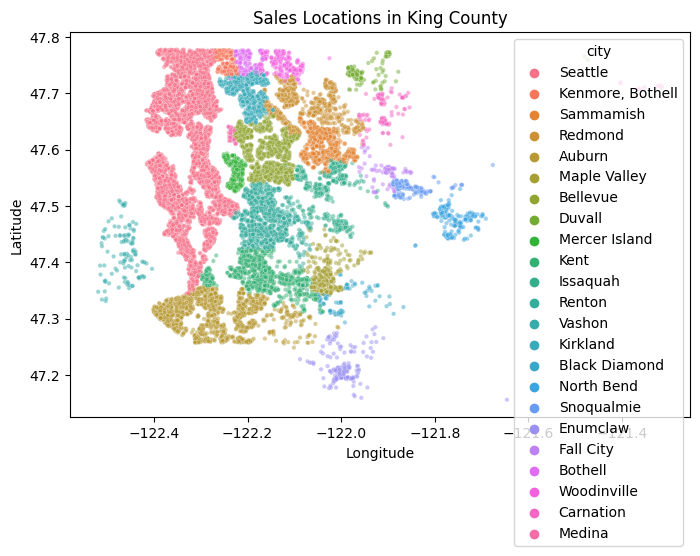

In [35]:
sns.scatterplot(df_location, x='long', y='lat', hue='city', alpha = 0.5, s=10)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Sales Locations in King County")
plt.savefig('')
plt.show()

In [36]:
df.groupby('city')['id'].count().sort_values(ascending=False)

city
Seattle             8973
Auburn              1690
Renton              1597
Bellevue            1407
Kent                1201
Redmond              977
Kirkland             977
Sammamish            800
Issaquah             733
Maple Valley         589
Snoqualmie           308
Kenmore, Bothell     283
Mercer Island        282
Woodinville          273
Enumclaw             233
North Bend           220
Bothell              195
Duvall               190
Carnation            124
Vashon               117
Black Diamond        100
Fall City             80
Medina                50
Name: id, dtype: int64

In [37]:
def cit_out(category):
    if category == 'Seattle':
        return 'Central'
    else:
        return 'Outskirt'

In [38]:
df['area'] = df['city'].apply(cit_out)

<Axes: xlabel='city', ylabel='price'>

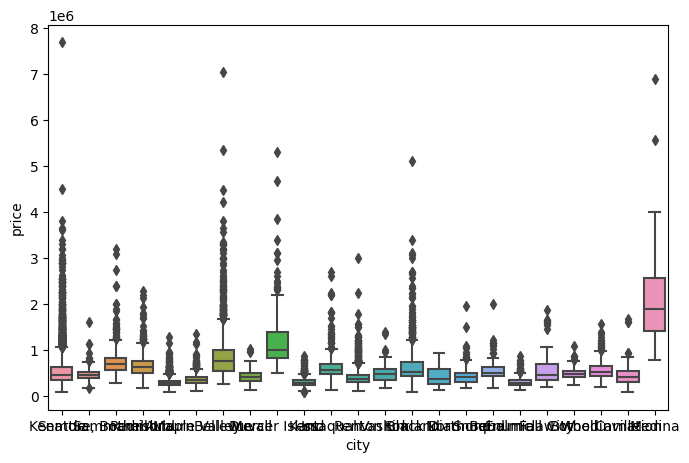

In [39]:
sns.boxplot(data = df, x = 'city', y = 'price')

In [40]:
central_lat_min, central_lat_max = 47.5, 47.7
central_long_min, central_long_max = -122.45, -122.26

# Central mathematical Latitude 47.60621, Longitude -122.33207 based on Chatgpt 4.1

df['location_type'] = df.apply(
    lambda row: 'central' if (central_lat_min <= row['lat'] <= central_lat_max) and
                                 (central_long_min <= row['long'] <= central_long_max)
                else 'outskirt',
    axis=1
)

In [41]:
df['location_type'].value_counts()

location_type
outskirt    15562
central      6035
Name: count, dtype: int64

In [42]:
df['area'].value_counts()

area
Outskirt    12624
Central      8973
Name: count, dtype: int64

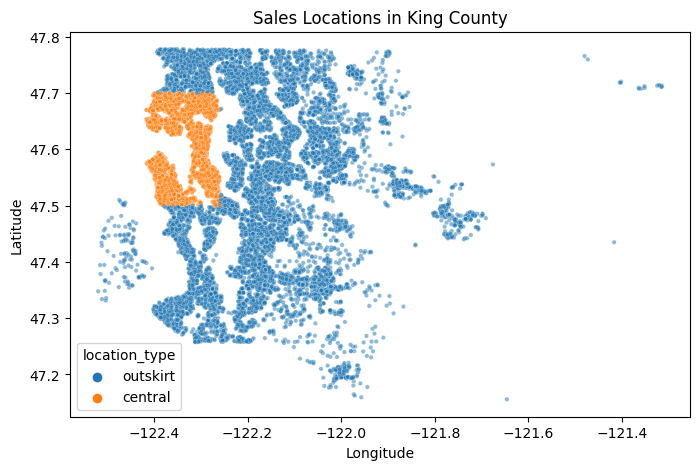

In [43]:
sns.scatterplot(df, x='long', y='lat', hue='location_type', alpha = 0.5, s=10)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Sales Locations in King County")
plt.show()

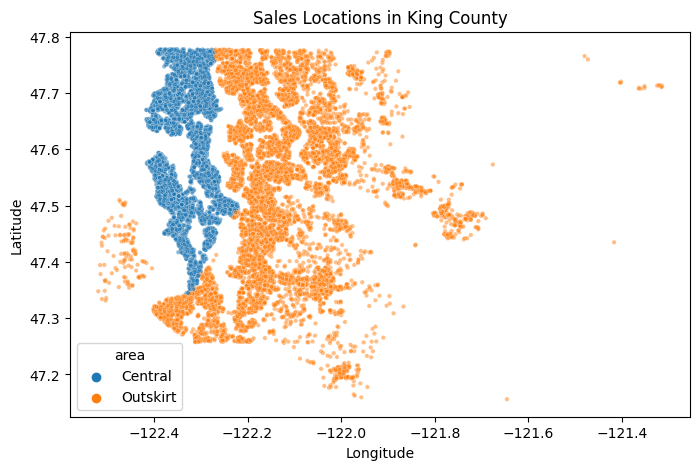

In [44]:
sns.scatterplot(df, x='long', y='lat', hue='area', alpha = 0.5, s=10)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Sales Locations in King County")
plt.show()

##### Date & Time

In [45]:
df['quarter'] = df['date'].dt.quarter
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [46]:
df_time = df[['id','yr_built','yr_renovated','date', 'month', 'quarter', 'year']]

<Axes: xlabel='month'>

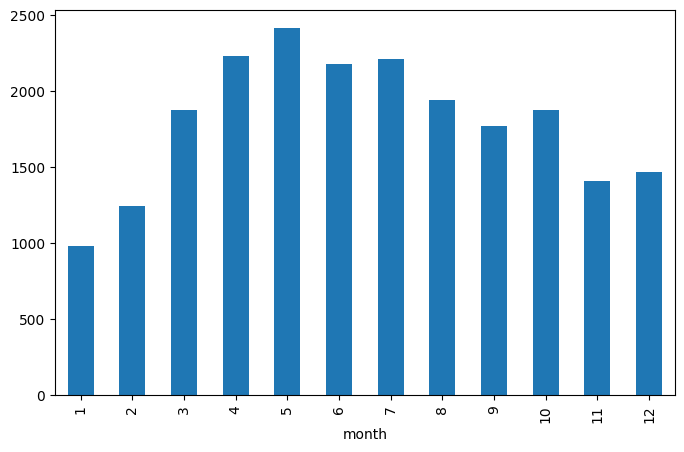

In [47]:
df_time.groupby('month')['id'].count().plot(kind='bar')

##### Geo

In [48]:
df_geo = df[['id','lat','long', 'zipcode']]

<Axes: xlabel='long', ylabel='lat'>

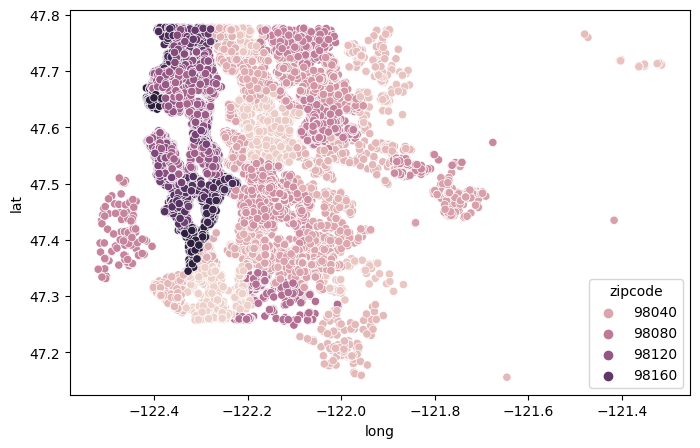

In [49]:
sns.scatterplot(data=df_geo, x='long', y='lat', hue='zipcode')

##### Further Exploration

<Axes: xlabel='city'>

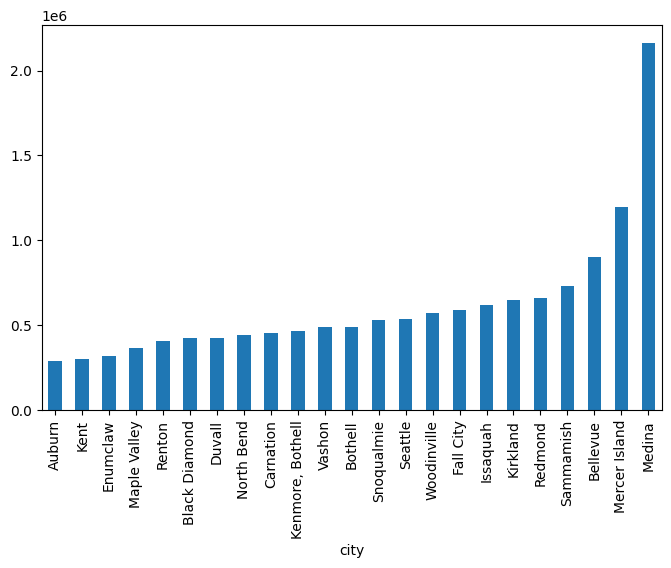

In [50]:
df.groupby('city')['price'].mean().sort_values() \
    .plot(kind='bar')

In [51]:
df['value_score'].describe()

count   21597.000
mean        3.934
std         0.675
min         1.000
25%         4.000
50%         4.000
75%         4.000
max        10.000
Name: value_score, dtype: float64

<Axes: >

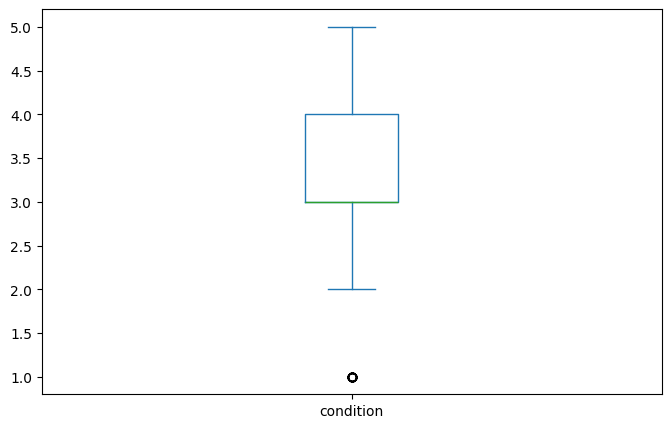

In [52]:
df['condition'].plot(kind='box')

<Axes: >

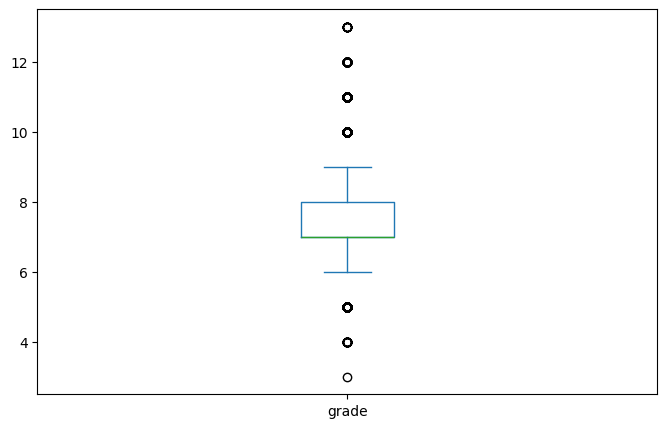

In [53]:
df['grade'].plot(kind='box')

##### Valuation

In [54]:
df_value = df[['id','condition','grade','price', 'value_score']]

<Axes: xlabel='value_score', ylabel='price'>

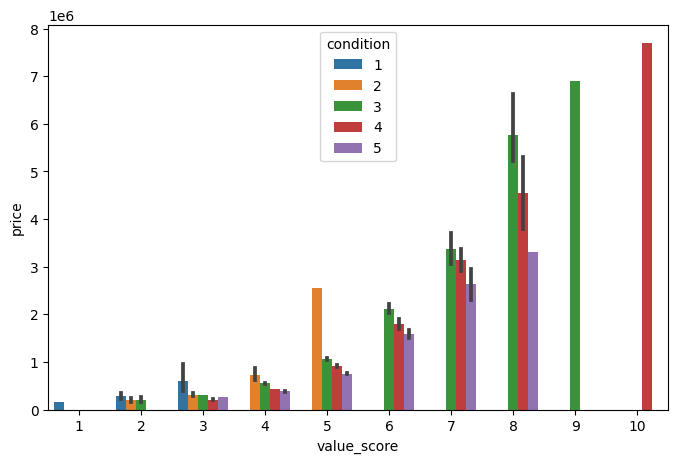

In [55]:
sns.barplot(data=df_value, x='value_score', y='price', hue='condition')

In [56]:
# 
q_low_grade = df['grade'].quantile(0.4)
q_high_grade = df['grade'].quantile(0.6)

q_low_condition = df['condition'].quantile(0.4)
q_high_condition = df['condition'].quantile(0.6)

q_low_price = df['price'].quantile(0.4)
q_high_price = df['price'].quantile(0.6)

# Subset of datafram
average_houses = df[
    (df['grade'] >= q_low_grade) & (df['grade'] <= q_high_grade) &
    (df['condition'] >= q_low_condition) & (df['condition'] <= q_high_condition) &
    (df['price'] >= q_low_price) & (df['price'] <= q_high_price)
]


#### Seasons

In [57]:
grouped = df.groupby(['location_type','year', 'month'])['price'].mean().reset_index()

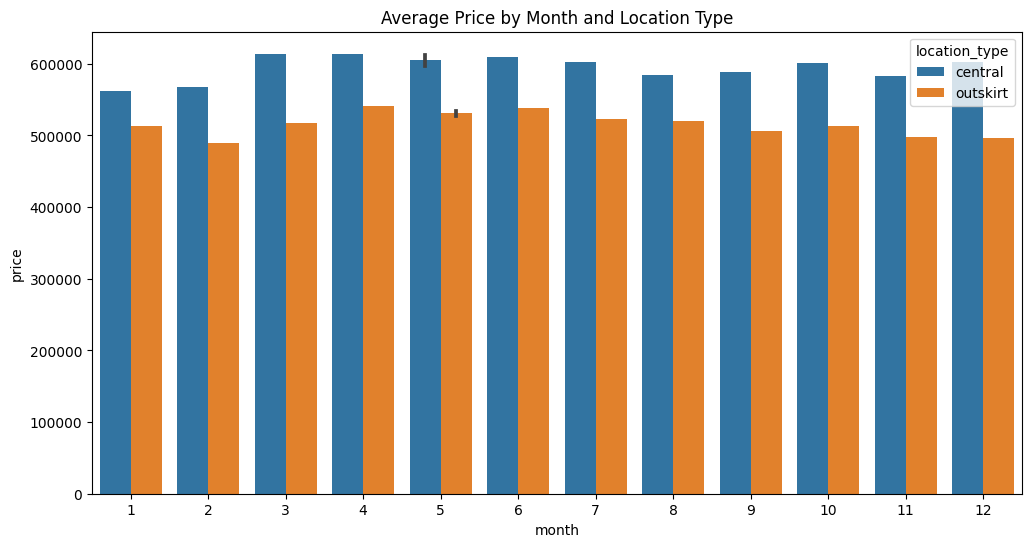

In [58]:
plt.figure(figsize=(12,6))
sns.barplot(data=grouped, x='month', y='price', hue='location_type')
plt.title('Average Price by Month and Location Type')
plt.show()

<Axes: xlabel='month', ylabel='price'>

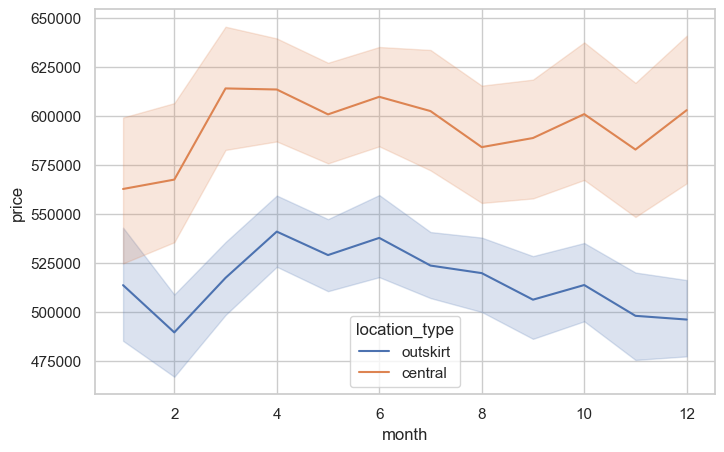

In [59]:
sns.set_theme(style="whitegrid")
sns.lineplot(data=df, x='month', y='price', hue='location_type')

### Difference between central property sales and outskirt property transactions compared to quarterly timing

In [60]:
# Subset datafram
mask = (df['date'] >= '2014-05-01') & (df['date'] < '2015-05-01')
df_date_subset = df.loc[mask]

# Sort by location and date
df_date_subset = df_date_subset.sort_values(['location_type', 'date'])

# Calculate days since previous sale within each group
df_date_subset['interval_days'] = df_date_subset.groupby('location_type')['date'].diff().dt.days

monthly_sales = df_date_subset.groupby(['location_type', 'month']).size().reset_index(name='sales_count')

interval_stats = df_date_subset.groupby(['location_type', 'month'])['interval_days'].agg(['mean', 'std', 'count']).reset_index()


In [61]:
df_date_subset.describe()

id  bedrooms  bathrooms  sqm_living    sqm_lot    floors  \
count      20951.000 20951.000  20951.000   20951.000  20951.000 20951.000   
mean  4581228274.996     3.376      2.118     193.429   1392.611     1.495   
min      1000102.000     1.000      0.500      34.374     48.309     1.000   
25%   2122869576.000     3.000      1.750     132.850    469.156     1.000   
50%   3904940200.000     3.000      2.250     178.372    707.915     1.500   
75%   7312150025.000     4.000      2.500     236.901    994.194     2.000   
max   9900000190.000    33.000      8.000    1257.897 153414.994     3.500   
std   2878483034.562     0.926      0.769      85.239   3769.007     0.540   

       waterfront      view  condition     grade  ...      long  sqm_living15  \
count   20951.000 20888.000  20951.000 20951.000  ... 20951.000     20951.000   
mean        0.007     0.234      3.411     7.662  ...  -122.214       184.649   
min         0.000     0.000      1.000     3.000  ...  -122.519        42.735   
25%         0.000     0.000      3.000     7.000  ...  -122.329       138.424   
50%         0.000     0.000      3.000     7.000  ...  -122.231       170.940   
75%         0.000     0.000      4.000     8.000  ...  -122.125       220.178   
max         1.000     4.000      5.000    13.000  ...  -121.315       576.923   
std         0.083     0.768      0.652     1.173  ...     0.141        63.659   

       sqm_lot15                           date       price  value_score  \
count  20951.000                          20951   20951.000    20951.000   
mean    1176.636  2014-10-23 08:15:33.377881600  539744.755        3.935   
min       60.479            2014-05-02 00:00:00   78000.000        1.000   
25%      473.802            2014-07-18 00:00:00  320000.000        4.000   
50%      708.287            2014-10-10 00:00:00  450000.000        4.000   
75%      937.059            2015-02-04 00:00:00  645000.000        4.000   
max    80936.455            2015-04-30 00:00:00 7700000.000       10.000   
std     2501.203                            NaN  365799.009        0.675   

        quarter     month      year interval_days  
count 20951.000 20951.000 20951.000     20949.000  
mean      2.541     6.623  2014.302         0.035  
min       1.000     1.000  2014.000         0.000  
25%       2.000     4.000  2014.000         0.000  
50%       3.000     7.000  2014.000         0.000  
75%       3.000     9.000  2015.000         0.000  
max       4.000    12.000  2015.000         3.000  
std       1.046     3.150     0.459         0.196  

[8 rows x 26 columns]

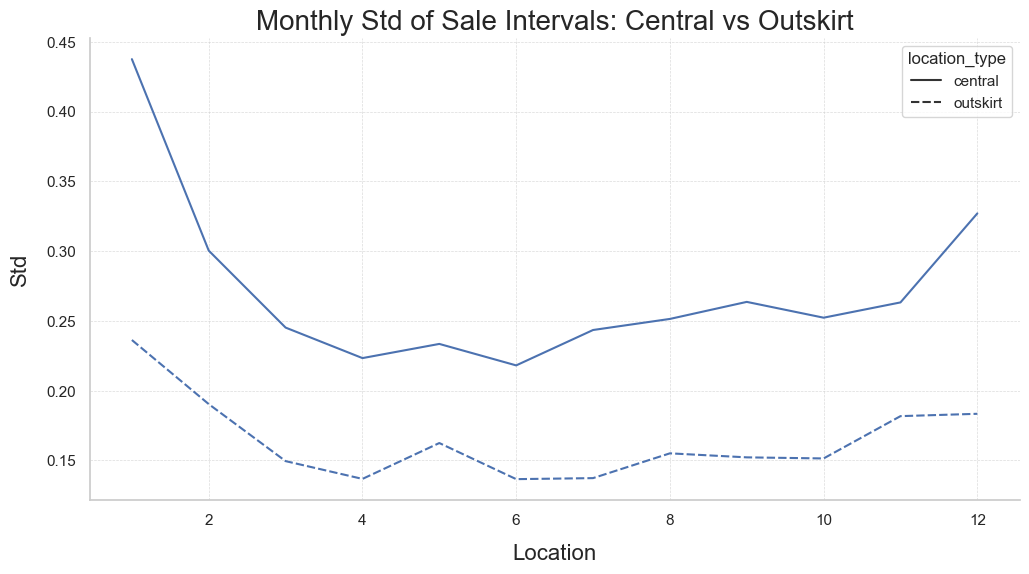

In [94]:
plt.figure(figsize=(12,6))
sns.lineplot(x='month', y='std', data=interval_stats, style='location_type')
plt.title('Monthly Std of Sale Intervals: Central vs Outskirt', fontsize=20)
plt.xlabel('Location', fontsize=16, labelpad=12)
plt.ylabel('Std', fontsize=16, labelpad=12)

# Add grid and background
plt.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
sns.despine()

plt.savefig('Std_Sale_Interval_CenvsOut_1.png')
plt.show()

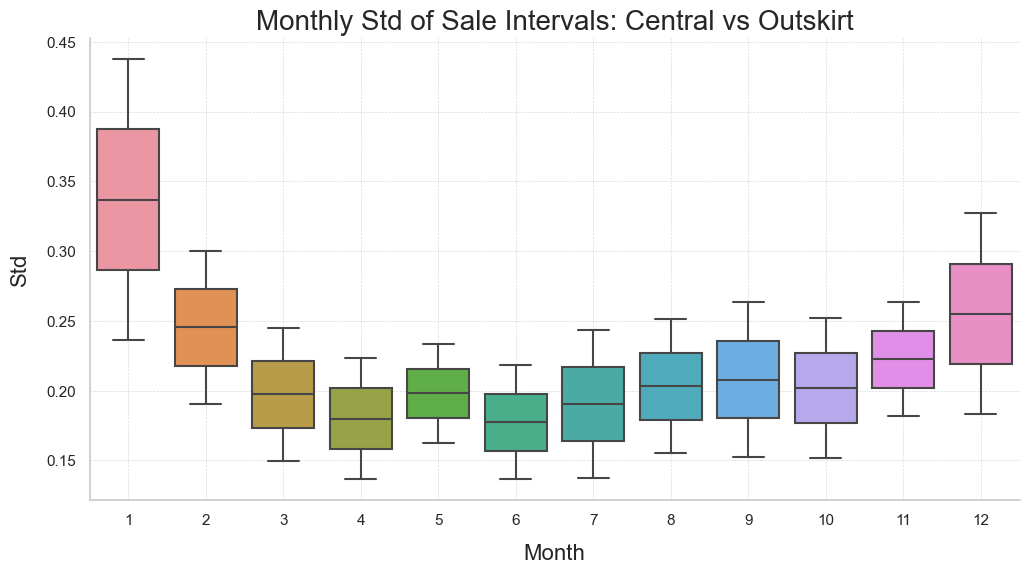

In [93]:
plt.figure(figsize=(12,6))
sns.boxplot(x='month', y='std', data=interval_stats,)
plt.title('Monthly Std of Sale Intervals: Central vs Outskirt', fontsize=20)
plt.xlabel('Month', fontsize=16, labelpad=12)
plt.ylabel('Std', fontsize=16, labelpad=12)

# Add grid and background
plt.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
sns.despine()

plt.savefig('Std_Sale_Interval_CenvsOut_2.png')
plt.show()

In [64]:
interval_stats

location_type  month  mean   std  count
0        central      1 0.126 0.438    247
1        central      2 0.092 0.300    305
2        central      3 0.060 0.245    519
3        central      4 0.046 0.223    655
4        central      5 0.054 0.234    541
5        central      6 0.050 0.218    600
6        central      7 0.052 0.243    598
7        central      8 0.059 0.251    511
8        central      9 0.061 0.264    506
9        central     10 0.056 0.252    555
10       central     11 0.069 0.263    406
11       central     12 0.083 0.327    396
12      outskirt      1 0.041 0.236    731
13      outskirt      2 0.031 0.190    942
14      outskirt      3 0.023 0.150   1356
15      outskirt      4 0.019 0.137   1574
16      outskirt      5 0.024 0.162   1225
17      outskirt      6 0.019 0.137   1578
18      outskirt      7 0.019 0.137   1613
19      outskirt      8 0.022 0.155   1428
20      outskirt      9 0.024 0.152   1265
21      outskirt     10 0.023 0.151   1321
22      outskirt     11 0.030 0.182   1003
23      outskirt     12 0.029 0.183   1074

<Axes: xlabel='month', ylabel='count'>

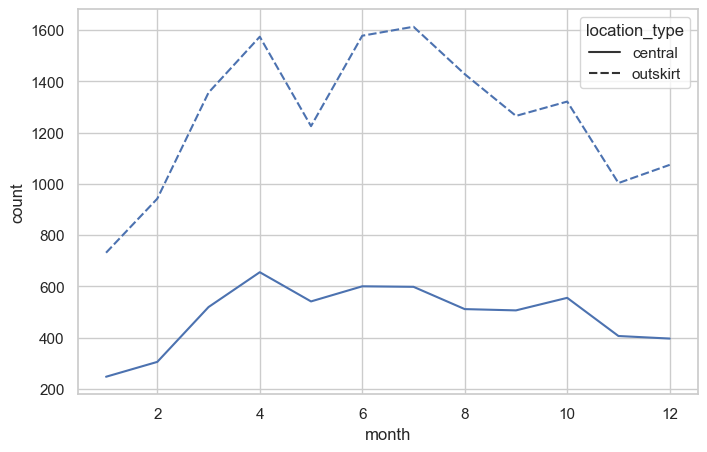

In [65]:
sns.lineplot(x="month", y="count", style='location_type',
             data=interval_stats)

### Top 10% Properties to average

In [122]:
average_houses_out = average_houses[average_houses['location_type'] == 'outskirt']
average_houses_out = average_houses_out[''] 

zipcode
98168   3.000
98148   3.500
98198   3.625
98188   3.667
98166   3.727
98115   3.750
98118   3.750
98092   3.800
98034   3.807
98007   3.812
98072   3.828
98008   3.829
98133   3.831
98028   3.838
98033   3.839
98056   3.860
98011   3.879
98074   3.883
98155   3.894
98042   3.900
98014   3.909
98024   3.909
98125   3.910
98065   3.914
98053   3.916
98038   3.917
98019   3.918
98070   3.923
98055   3.923
98027   3.925
98177   3.927
98052   3.932
98059   3.936
98178   3.941
98006   3.944
98077   3.950
98029   3.974
98045   3.980
98003   4.000
98005   4.000
98010   4.000
98146   4.000
98058   4.000
98023   4.000
98117   4.000
98103   4.000
98030   4.000
98075   4.000
98031   4.000
98022   4.000
98001   4.000
Name: value_score, dtype: float64

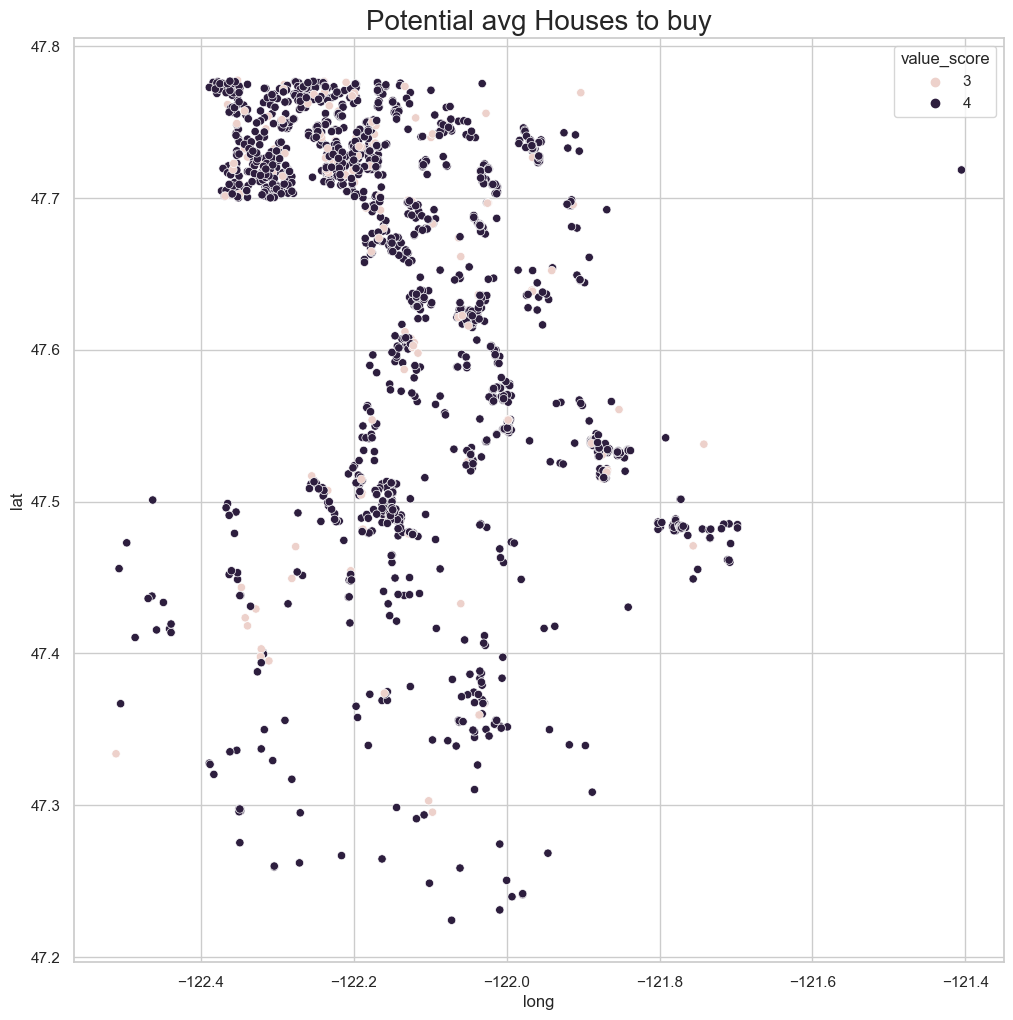

In [115]:
plt.figure(figsize=(12,12))

sns.scatterplot(data=average_houses_out, x='long', y='lat', hue ='value_score')

plt.title('Potential avg Houses to buy', fontsize=20)

plt.savefig('avgHousesToBuy.png')

In [67]:
quan90 = df['value_score'].quantile(0.9)
df_top10 = df[df['value_score'] >= quan90]
df_top10.shape

(3172, 28)

In [68]:
df_top10.head()

id  bedrooms  bathrooms  sqm_living  sqm_lot  floors  waterfront  \
5   7237550310     4.000      4.500     503.530 9469.528   1.000       0.000   
21  2524049179     3.000      2.750     283.352 4168.246   1.000       0.000   
27  3303700376     3.000      1.000     130.063  146.878   1.500       0.000   
47  4178300310     4.000      2.500     212.746 1246.377   2.000       0.000   
49   822039084     3.000      2.500     255.760 6039.112   1.000       1.000   

    view  condition  grade  ...  sqm_lot15       date       price  \
5  0.000          3     11  ...   9469.528 2014-05-12 1230000.000   
21 4.000          3      9  ...   1889.260 2014-08-26 2000000.000   
27 0.000          5      8  ...    358.696 2014-12-01  667000.000   
47 0.000          4      9  ...   1271.368 2014-07-16  785000.000   
49 2.000          5      9  ...   6736.622 2015-03-11 1350000.000   

    value_score           city      area  location_type  quarter  month  year  
5             5        Redmond  Outskirt       outskirt        2      5  2014  
21            5  Mercer Island  Outskirt       outskirt        3      8  2014  
27            5        Seattle   Central        central        4     12  2014  
47            5       Bellevue  Outskirt       outskirt        3      7  2014  
49            6         Vashon  Outskirt       outskirt        1      3  2015  

[5 rows x 28 columns]

In [69]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_date_subset['price'].quantile(0.25)
Q3 = df_date_subset['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper bound (commonly 1.5 * IQR above Q3)
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove upper outliers
df_date_subset_no_outl = df_date_subset[df_date_subset['price'] <= upper_bound]

In [70]:
for col in ['grade', 'condition', 'sqm_living']:
    min_ = df_date_subset_no_outl[col].min()
    max_ = df_date_subset_no_outl[col].max()
    df_date_subset_no_outl[f'{col}_norm'] = (df_date_subset_no_outl[col] - min_) / (max_ - min_)

In [71]:
df_date_subset_no_outl['value_score'] =df_date_subset_no_outl[['grade_norm', 'condition_norm', 'sqm_living_norm']].mean(axis=1)

In [72]:
df_date_subset_no_outl['value_price_ratio'] = df_date_subset_no_outl['value_score'] / df_date_subset_no_outl['price'] * 10

In [73]:
df_date_subset_no_outl

id  bedrooms  bathrooms  sqm_living  sqm_lot  floors  \
1391   5100401414     2.000      1.000      81.754  592.716   1.000   
3710   6127600110     4.000      2.000     141.211  575.994   1.500   
4997   3390600010     3.000      1.000     101.263  597.826   1.000   
6705   5652600185     3.000      1.750     208.101  982.720   2.000   
7727   1962200037     3.000      2.250     162.579  146.042   2.500   
...           ...       ...        ...         ...      ...     ...   
17696  9264030040     3.000      2.500     246.191 1137.774   2.000   
17714  2207100165     4.000      1.500     146.786  953.177   1.000   
18243  6445800015     3.000      2.750     184.876 2898.551   1.000   
20621  3448001412     2.000      1.500      91.787  100.334   3.000   
20920  3023000410     5.000      2.750     222.965  455.221   2.000   

       waterfront  view  condition  grade  ...      area  location_type  \
1391        0.000 0.000          3      7  ...   Central        central   
3710        0.000 0.000          3      7  ...   Central        central   
4997        0.000 0.000          4      7  ...   Central        central   
6705        0.000 0.000          5      8  ...   Central        central   
7727        0.000 0.000          3      9  ...   Central        central   
...           ...   ...        ...    ...  ...       ...            ...   
17696       0.000 0.000          3      9  ...  Outskirt       outskirt   
17714       0.000 0.000          4      7  ...  Outskirt       outskirt   
18243       0.000 0.000          3      8  ...  Outskirt       outskirt   
20621       0.000 0.000          3      7  ...   Central       outskirt   
20920       0.000 0.000          3      8  ...  Outskirt       outskirt   

       quarter  month  year  interval_days  grade_norm  condition_norm  \
1391         2      5  2014          0.000       0.444           0.500   
3710         2      5  2014          0.000       0.444           0.500   
4997         2      5  2014          0.000       0.444           0.750   
6705         2      5  2014          0.000       0.556           1.000   
7727         2      5  2014          0.000       0.667           0.500   
...        ...    ...   ...            ...         ...             ...   
17696        2      4  2015          0.000       0.667           0.500   
17714        2      4  2015          0.000       0.444           0.750   
18243        2      4  2015          0.000       0.556           0.500   
20621        2      4  2015          0.000       0.444           0.500   
20920        2      4  2015          0.000       0.556           0.500   

       sqm_living_norm value_price_ratio  
1391             0.072             0.000  
3710             0.162             0.000  
4997             0.101             0.000  
6705             0.263             0.000  
7727             0.194             0.000  
...                ...               ...  
17696            0.321             0.000  
17714            0.170             0.000  
18243            0.228             0.000  
20621            0.087             0.000  
20920            0.286             0.000  

[19851 rows x 33 columns]

In [ ]:
average houses

<Axes: xlabel='month', ylabel='value_price_ratio'>

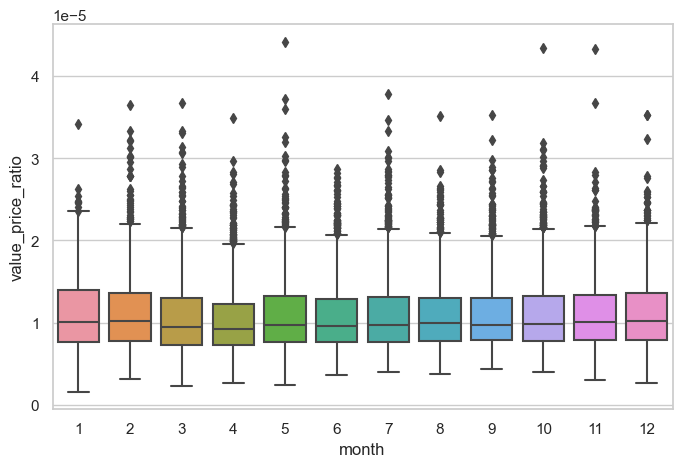

In [74]:
sns.boxplot(data=df_date_subset_no_outl, x='month', y='value_price_ratio')

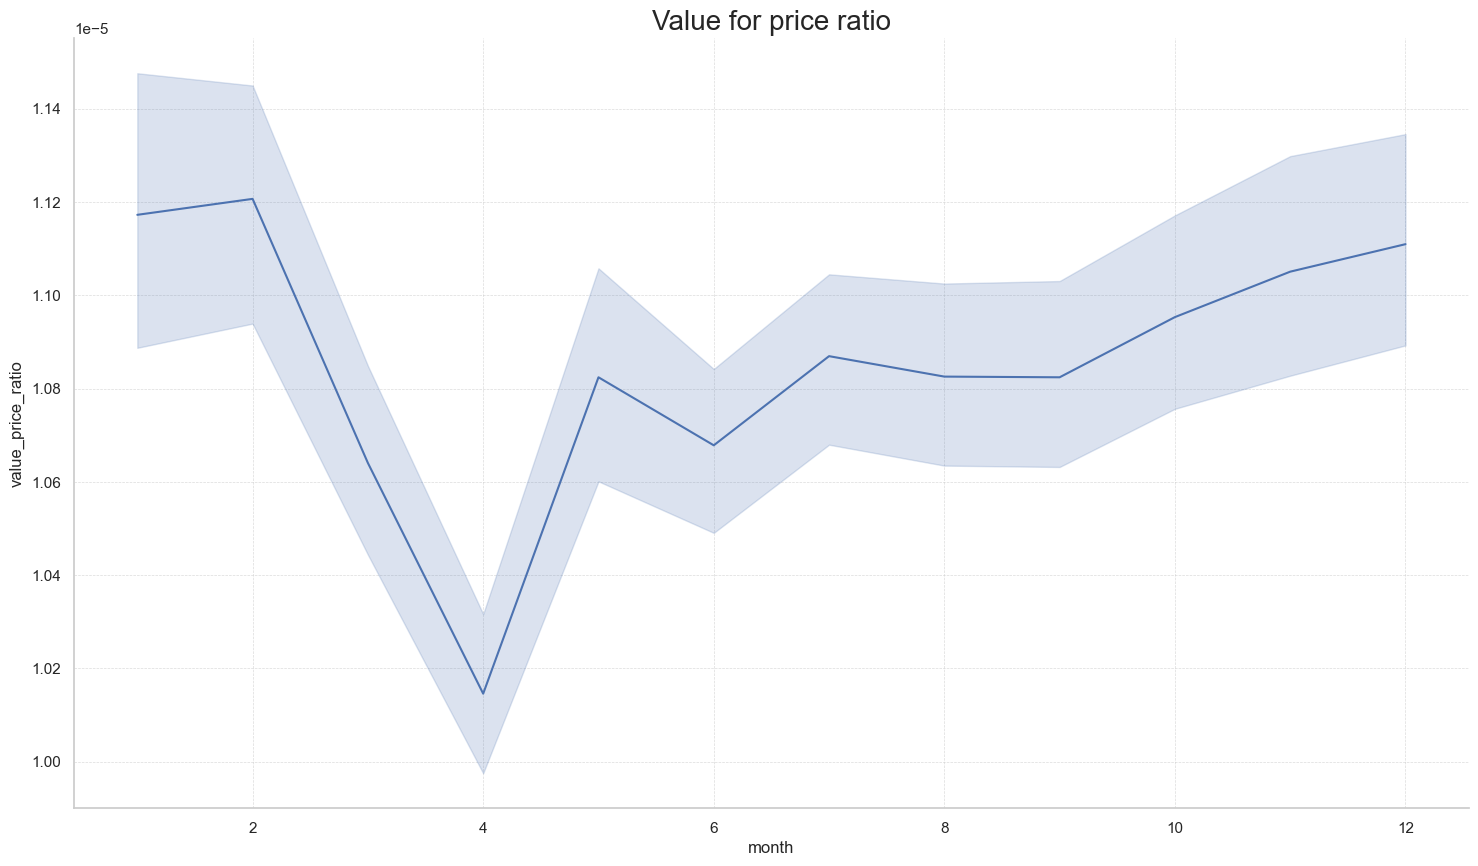

In [96]:
plt.figure(figsize=(18, 10))
sns.lineplot(data=df_date_subset_no_outl, x='month', y='value_price_ratio')
plt.title('Value for price ratio', fontsize=20)
# Add grid and background
plt.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
plt.savefig('Value_price_ratio0.png')
sns.despine()

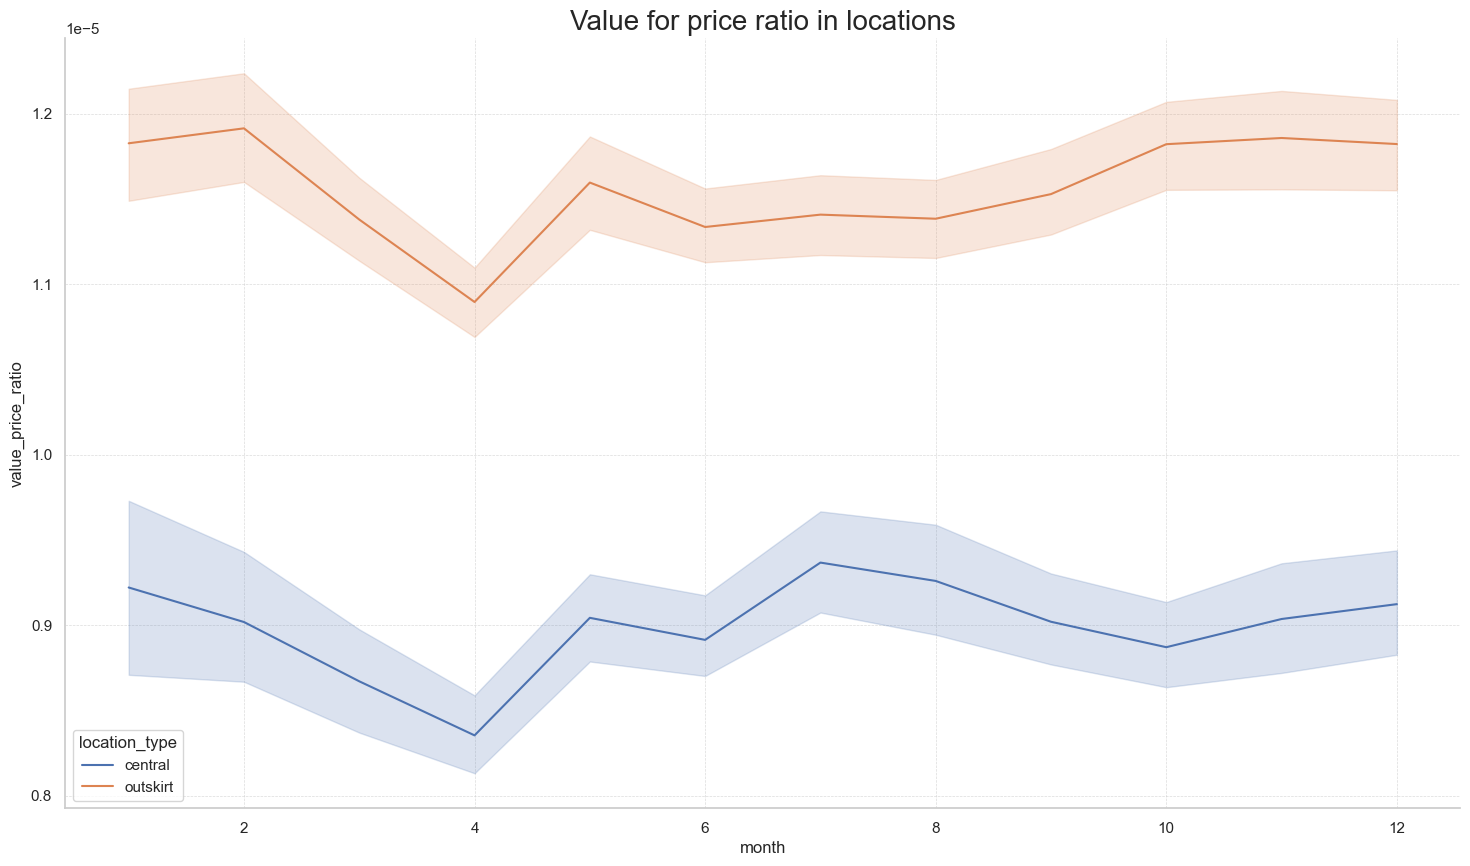

In [91]:
plt.figure(figsize=(18, 10))
sns.lineplot(data=df_date_subset_no_outl, x='month', y='value_price_ratio', hue='location_type')
plt.title('Value for price ratio in locations', fontsize=20)
# Add grid and background
plt.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
plt.savefig('Value_price_ratio1.png')
sns.despine()

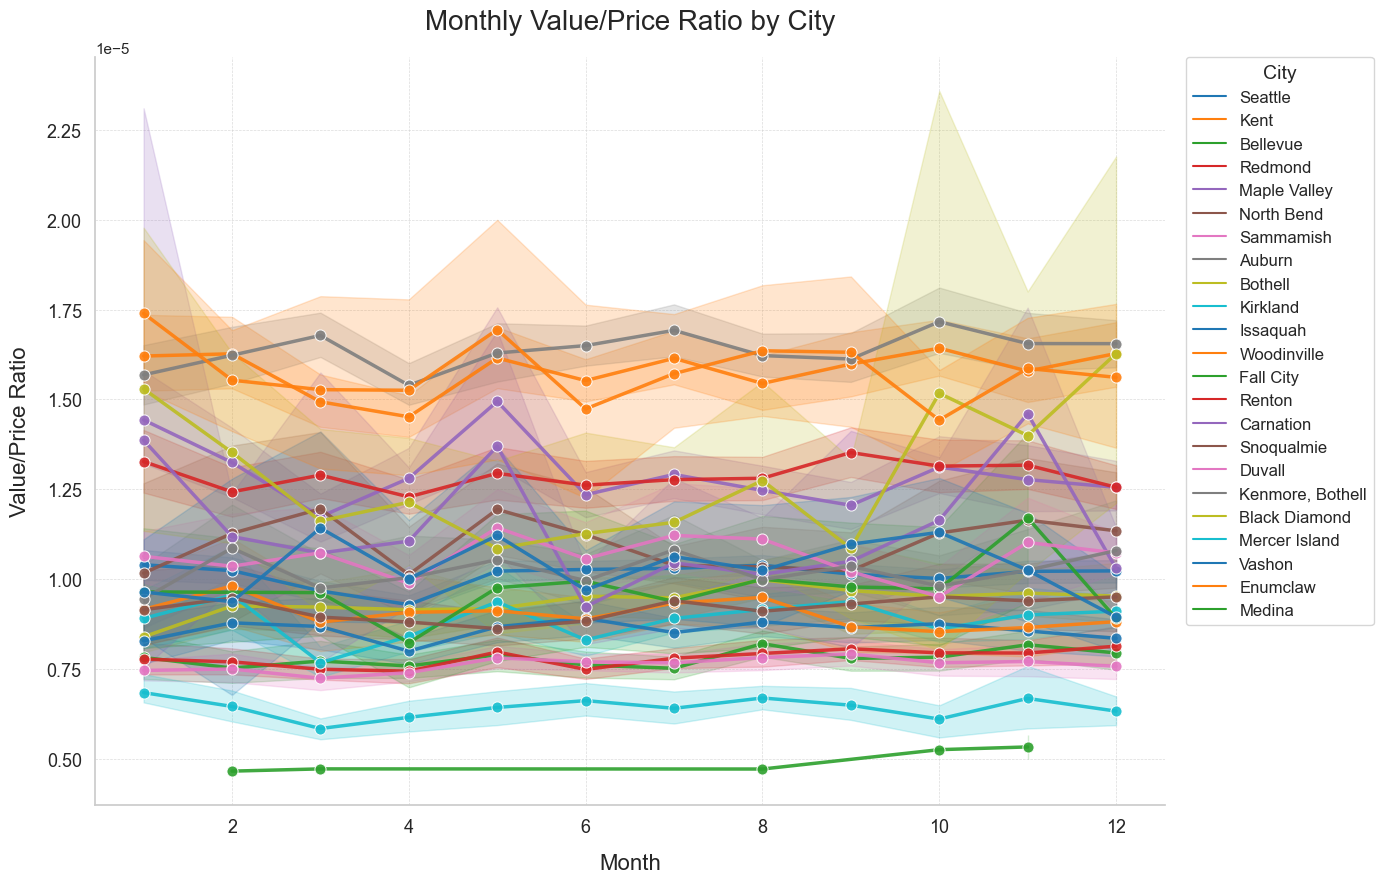

In [86]:
plt.figure(figsize=(14, 9))

# Use a colorblind-friendly palette
palette = sns.color_palette("tab10", n_colors=df_date_subset_no_outl['city'].nunique())

# Draw the lineplot
sns.lineplot(
    data=df_date_subset_no_outl,
    x='month',
    y='value_price_ratio',
    hue='city',
    palette=palette,
    linewidth=2.5,
    marker='o',
    markersize=8,
    alpha=0.9
)

# Improve legend
plt.legend(title='City', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0., fontsize=12, title_fontsize=14)

# Add grid and background
plt.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
sns.despine()

# Axis labels and title
plt.xlabel("Month", fontsize=16, labelpad=12)
plt.ylabel("Value/Price Ratio", fontsize=16, labelpad=12)
plt.title("Monthly Value/Price Ratio by City", fontsize=20, pad=20)

# Tweak ticks
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.tight_layout()
plt.savefig('Value_price_ratio2.png', dpi=300, bbox_inches='tight')
plt.show()


### Geographic Distribution of Sales

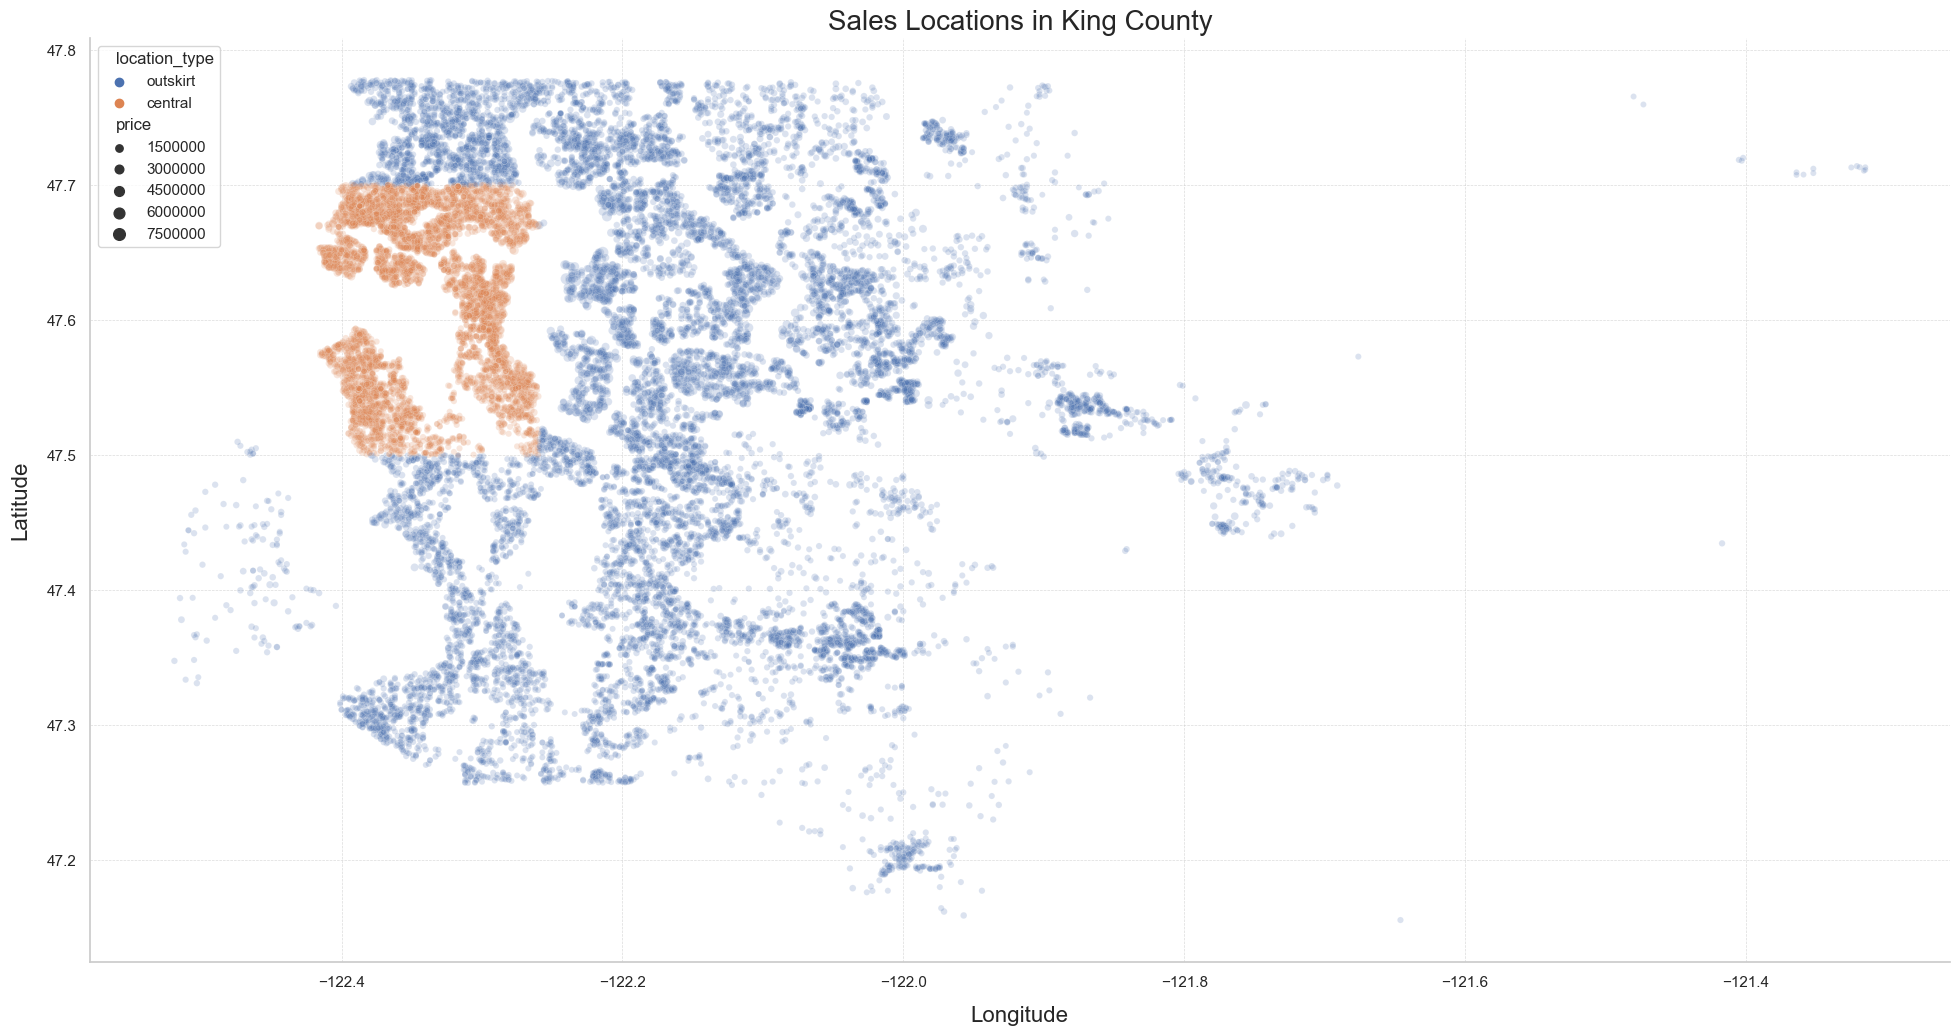

In [90]:
plt.figure(figsize=(24, 12))

sns.scatterplot(df, x='long', y='lat', hue='location_type', size='price', alpha = 0.2, s=1)
# Add grid and background
plt.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
sns.despine()
plt.xlabel("Longitude", fontsize=16, labelpad=12)
plt.ylabel("Latitude", fontsize=16, labelpad=12)
plt.title("Sales Locations in King County", fontsize=20)
plt.savefig('sales_by_locationtype.png')
plt.show()

In [78]:
# calculating sales per zipcode
sales_per_zip = df.groupby('city').size().reset_index(name='sales_count')

In [79]:
# Defining the centers of the zipcodes to display in a scatterplot
city_centers = df.groupby('city')[['lat', 'long']].mean().reset_index()

In [80]:
city_density = pd.merge(sales_per_zip, city_centers, on='city')
city_density

city  sales_count    lat     long
0             Auburn         1690 47.309 -122.277
1           Bellevue         1407 47.594 -122.156
2      Black Diamond          100 47.333 -121.999
3            Bothell          195 47.755 -122.201
4          Carnation          124 47.671 -121.849
5             Duvall          190 47.737 -121.955
6           Enumclaw          233 47.211 -121.996
7          Fall City           80 47.559 -121.905
8           Issaquah          733 47.538 -122.027
9   Kenmore, Bothell          283 47.755 -122.246
10              Kent         1201 47.376 -122.165
11          Kirkland          977 47.703 -122.199
12      Maple Valley          589 47.371 -122.032
13            Medina           50 47.626 -122.234
14     Mercer Island          282 47.560 -122.226
15        North Bend          220 47.473 -121.759
16           Redmond          977 47.680 -122.080
17            Renton         1597 47.478 -122.163
18         Sammamish          800 47.608 -122.035
19           Seattle         8973 47.613 -122.332
20        Snoqualmie          308 47.532 -121.862
21            Vashon          117 47.417 -122.464
22       Woodinville          273 47.751 -122.132

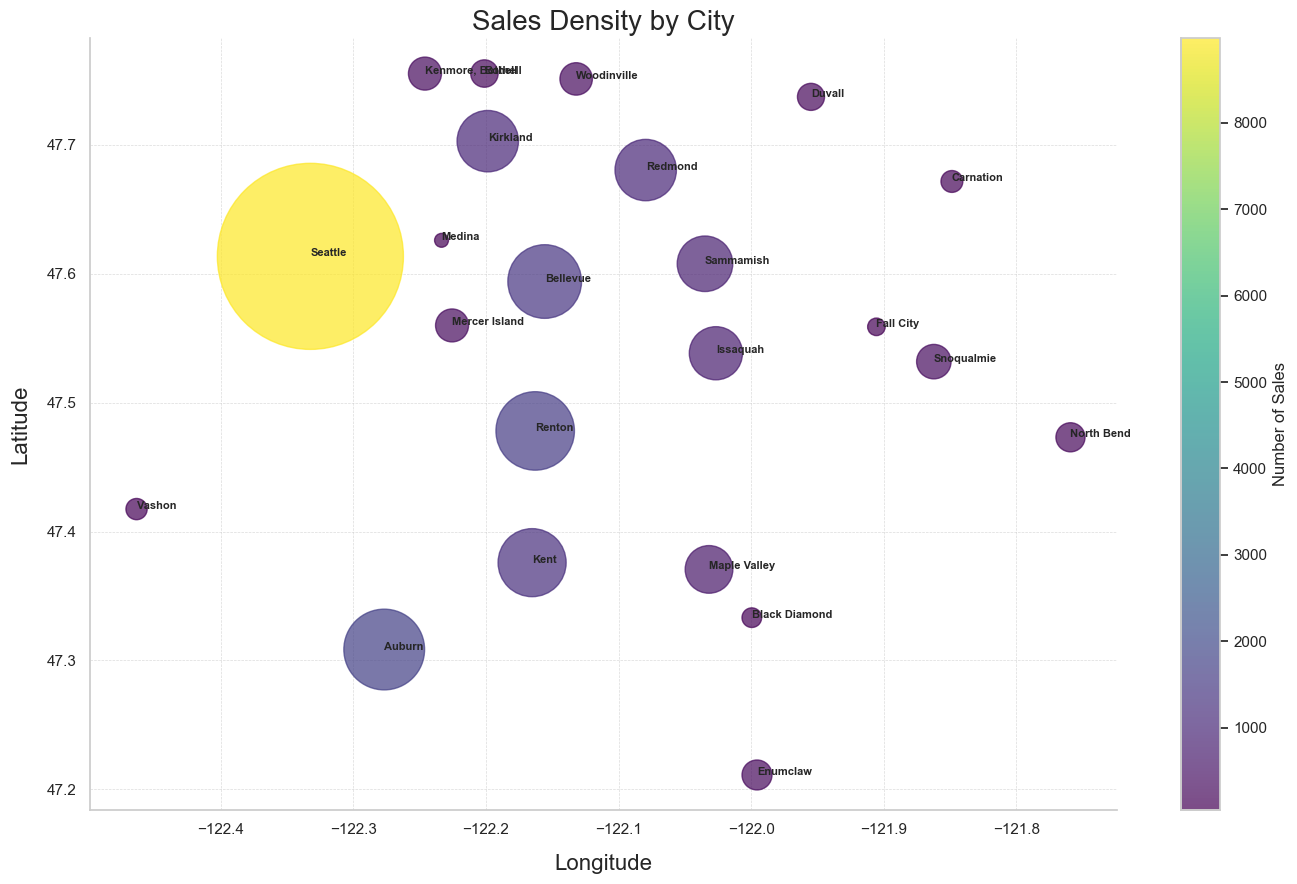

In [88]:
plt.figure(figsize=(14, 9))
sc = plt.scatter(city_density['long'], city_density['lat'],
                 s=city_density['sales_count']*2, 
                 c=city_density['sales_count'],
                 cmap='viridis', alpha=0.7)
plt.colorbar(sc, label='Number of Sales')

# city names label:
for _, row in city_density.iterrows():
    plt.text(row['long'], row['lat'], str(row['city']), fontsize=8, fontweight='bold')

# Add grid and background
plt.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
sns.despine()

plt.xlabel('Longitude', fontsize=16, labelpad=12)
plt.ylabel('Latitude', fontsize=16, labelpad=12)
plt.title('Sales Density by City', fontsize=20)
plt.tight_layout()
plt.savefig('salesdensity_bycity.png')
plt.show()